# Homwork 6 Problem 1

## Luke Meiler

### Exponential Fit

We start by making some import statements to help with the math and plotting for out fit function.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Next, the automatic linting is turned on. This is throwing an actual error for some reason with the chi_square_fit_exp function for some reason, so I cannot actually lint that code, but the rest should be fine.

In [35]:
%load_ext pycodestyle_magic
%pycodestyle_off

Next, the methane data is parsed from the txt file downloaded off of the desired website. This is done using numpy's genfromtxt function. We only care about the time, methane level, and uncertainty from this data, so only these columns are pulled.

In [34]:
data = np.genfromtxt(fname='ch4_crv_tower-insitu_1_ccgg_HourlyData.txt', usecols=(7,8,9),delimiter=' ', skip_header = 199,
                     missing_values = "-99.99")
type(data)

numpy.ndarray

Even though we now have this data, it is in an inconvienient form. This get_vals function is defined so that we take the format of the pulled data and rearrange it into a list of three lists: the time values, CH4 levels, and uncertainties.

In [35]:
def get_vals(data):
    """This function takes the data set generated from the
    numpy genfromtxt function of the three desired columns
    and returns a list of three lists: the times, CH4 levels,
    and uncertainties.

    Parameters:

    data: numpy.ndarry

        The set of data that you wish to rearrange into a list of its
        columns in each list.

    Returns:

    master_list: list

        A list containing a list for each column in the inputed data set
        with the elements of said column.

    """
    x_list = []
    y_list = []
    err_list = []
    master_list = []
    for i in data:
        x_list.append(i[0])
        y_list.append(i[1])
        err_list.append(i[2])
    master_list.append(x_list)
    master_list.append(y_list)
    master_list.append(err_list)
    return master_list


data_list = get_vals(data)
x_data = data_list[0]
y_data = data_list[1]
err_data = data_list[2]

length = len(x_data)

type(data_list)

list

### The Function

Now that we have the data, we make an adjustment to the linear fit function given in class. We want to plot the log of the exponential increase, so we take the log of both sides of the equation to give $y' = ln(y) = ln(a) + bx$. We then can plot this linearly. This function iterates several times through the data set to calculate the necessary sums and return the trendline parameters. 

I was having difficulty with the numpy sum functions as they were adding an integer to a list, so I instead just used for loops. This is far from efficient, but it at least seems to work. A possible future improvement to this notebook would be to reduce the computation time of this following function by reducing the number of for loops that it contains.

In [36]:
def chi_square_fit_exp(x, y, err):
    """This function takes a list of x, y, and error values that
    it assumes behaves exponentially. It takes the natural log of
    the y values and returns the parameters for a linear trendline
    to fit the given data, as well as the associated uncertainties.
    
    Parameters:

    x: list

        The list of x values for the fit that you want to generate

    y: list

        The list of y values for the fit that you want to generate

    err: list

        The list of error values for each y value in the fit that
        you want to generate


    Returns:

    a: numpy.float64

        The a value for your fit; corresponds to the y intercept

    b: numpy.float64

        The b value for your fit; corresponds to the slope

    sigma_a: numpy.float64

        The uncertainty in your a value

    sigma_b: numpy.float64

        The uncertainty in your b value

    chi_square: numpy.float64

        The general goodness of the fit
    """
    n = len(x)
    lny = []
    err_corr = []
    for i in y:
        lny_i = np.log(i)
        lny.append(lny_i)
    for i in err:
        index = err.index(i)
        err_i = i / (abs(y[index]))
        err_corr.append(err_i)
    if n < 2 :
        print ('Error! Need at least 2 data points!')
        exit()
    S = 0
    S_x = 0
    S_y = 0
    t = []
    S_tt = 0
    for i in err_corr:
        index = err_corr.index(i)
        S += 1/(i**2)
        S_x += x[index] / (i**2)
        S_y += lny[index] / (i**2)
    for i in err_corr:
        index = err_corr.index(i)
        t.append((x[index] - S_x/S) / i)
    for i in t:
        S_tt += i**2
#    S = np.sum(1/err_corr**2)
    if abs(S) < 0.00001 :
        print ('Error! Denominator S is too small!')
        exit()
#    S_x = np.sum(x/err_corr**2)
#    S_y = np.sum(lny/err_corr**2)
#    t = (x - S_x/S) / err_corr
#    S_tt = np.sum(t**2)
    if abs(S_tt) < 0.00001 :
        print ('Error! Denominator S is too small!')
        exit()
    b = 0
    a = 0
    for i in err_corr:
        index = err_corr.index(i)
        b += (t[index]*lny[index] / i)
    b = b / S_tt
#    b = np.sum(t*lny/err_corr) / S_tt
    a = (S_y - (S_x * b)) / S
    sigma_a2 = (1 + S_x**2/S/S_tt) / S
    sigma_b2 = 1/S_tt
    if sigma_a2 < 0.0 or sigma_b2 < 0.0 :
        print ('Error! About to pass a negative to sqrt')
        exit()
    sigma_a = np.sqrt(sigma_a2)
    sigma_b = np.sqrt(sigma_b2)
    chi_square = 0
    for i in err_corr:
        index = err_corr.index(i)
        chi_square += ((lny[index] - a - b*x[index]) / i**2)
#    chi_square = np.sum(((lny - a - b*x) / err_corr)**2)
    return(a, b, sigma_a, sigma_b, chi_square)

Now that the function has been defined, we call it using the data that we organized before. We then print the pertinent values from the fit that we made.

In [37]:
fit = chi_square_fit_exp(x_data, y_data, err_data)

In [38]:
print("The 'a' value of the fit: {}, The b value of the fit: {}, The chi squared value of the fit: {}".format(fit[0], fit[1], fit[4]))

The 'a' value of the fit: 2.980429189242186, The b value of the fit: 0.002270913221736406, The chi squared value of the fit: 79.67369912831782


### The Plot

Finally, we can now plot our data and trendline. We use the tool that were imported at the beginning of the notebook, matplotlib, to accomplish this. The data is located from about 2015 to 2020, so the plot is centered on this time period.

 slope = 0.002270913221736406  +-  1.6383757328805412e-07
 intercept = 2.980429189242186 +- 0.0003301560158090941
 chi-square/d.o.f. =  0.0006525389369876478


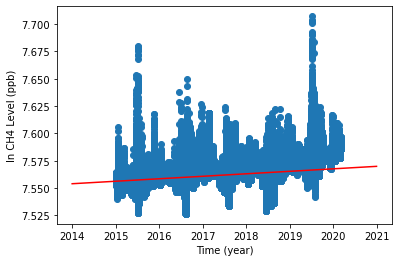

In [39]:
plt.scatter(x_data, np.log(y_data))

print(' slope =', fit[1], ' +- ', fit[3])
print(' intercept =', fit[0], '+-', fit[2])
if len(data) - 2 > 0 :
    print(' chi-square/d.o.f. = ', fit[4]/(len(data)-2))
else:
    print(' chi-square/d.o.f. undefined')

x_vals = np.linspace(2014, 2021)
fitline = fit[0] + fit[1] * x_vals
plt.plot(x_vals,fitline, '-r')
plt.xlabel("Time (year)")
plt.ylabel("ln CH4 Level (ppb)")
plt.show()

We can see that overall the trendline is not bad. If the data is much more dense near the bottom of the plot than in the peaks at the top, we can say that this trendline fits the function well. However, the line looks to be a little low for the plot.

We can also see how the fit works for smaller ranges of the data. For instace, let's see how it looks for half of the data on either side.

In [40]:
half_length = int(length / 2)

x_data2 = x_data[:half_length]
y_data2 = y_data[:half_length]
err_data2 = err_data[:half_length]

In [41]:
fit_first_half = chi_square_fit_exp(x_data2, y_data2, err_data2)

 slope = 0.002440305656323746  +-  4.4465028632021274e-07
 intercept = 2.638995001661068 +- 0.0008960086495397505
 chi-square/d.o.f. =  -0.0002889621664718969


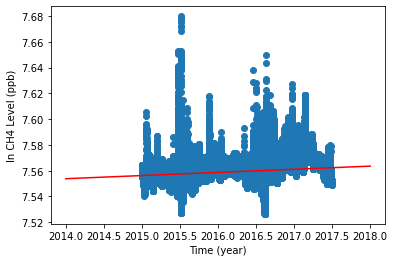

In [42]:
plt.scatter(x_data2, np.log(y_data2))

print(' slope =', fit_first_half[1], ' +- ', fit_first_half[3])
print(' intercept =', fit_first_half[0], '+-', fit_first_half[2])
if len(x_data2) - 2 > 0 :
    print(' chi-square/d.o.f. = ', fit_first_half[4]/(len(x_data2)-2))
else:
    print(' chi-square/d.o.f. undefined')

x_vals2 = np.linspace(2014, 2018)
fitline2 = fit_first_half[0] + fit_first_half[1] * x_vals2
plt.plot(x_vals2,fitline2, '-r')
plt.xlabel("Time (year)")
plt.ylabel("ln CH4 Level (ppb)")
plt.show()

We can see here that the fit looks approximately the same as the full dataset. For completeness, we can also look at the second half of the data.

In [43]:
x_data3 = x_data[half_length:]
y_data3 = y_data[half_length:]
err_data3 = err_data[half_length:]

In [44]:
fit_second_half = chi_square_fit_exp(x_data3, y_data3, err_data3)

In [45]:
print(fit_second_half[0], fit_second_half[1], fit_second_half[4])
print(len(x_data3))

-76.29197449174762 0.04156299082564495 -90.40988408010071
61050


 slope = 0.04156299082564495  +-  1.0921227651248664e-06
 intercept = -76.29197449174762 +- 0.0022035885289049613
 chi-square/d.o.f. =  -0.0014809638985732656


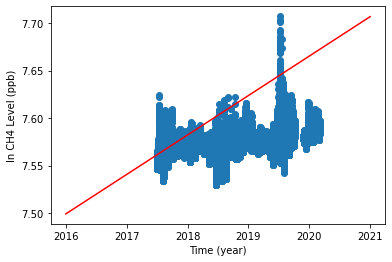

In [46]:
plt.scatter(x_data3, np.log(y_data3))

print(' slope =', fit_second_half[1], ' +- ', fit_second_half[3])
print(' intercept =', fit_second_half[0], '+-', fit_second_half[2])
if len(x_data3) - 2 > 0 :
    print(' chi-square/d.o.f. = ', fit_second_half[4]/(len(x_data3)-2))
else:
    print(' chi-square/d.o.f. undefined')

x_vals3 = np.linspace(2016, 2021)
fitline3 = fit_second_half[0] + fit_second_half[1] * x_vals3
plt.plot(x_vals3,fitline3, '-r')
plt.xlabel("Time (year)")
plt.ylabel("ln CH4 Level (ppb)")
plt.show()

We see here that either the distribution of the data is much higher than the other intervals considered, or the fitting function encountered a difficulty. Seeing as the chi squared value is negative, it is safe to assume that something has gone wrong with the fitting here. This likely has something to do with the transition to taking the natural log of the plot.